CONTINUED...PART2

Transfer Learning RS126 and GPCR dataset using Deep learning models

***Summary:***

Transfer Learning RS126 and GPCR dataset using Deep learning models

1. Datacleaning, AAindex property extraction

3. Padding of sequences

4. PCA (reduced features to 8)

4. Model training and testing

5. Model evaluation

6. Stratified KFold Cross_validation

7. Classification_report

8. Confusion matrix

9. Matrices: Accuracy score, Precision, Recall, F1 score, MCC

10. Model Accuracy vs CV accuracy comparision plot

11. Model Comparision on Matrices: Accuracy score,

12. Precision, Recall, F1 score, MCC plots

13. Confidence Interval (CI) and McNemar’s Test Function

13. ROC by One-vs-Rest (OvR) % Interpretation of results

In [ ]:
## RS126 data ###
###read csv file
import pandas as pd
import numpy as np
df = pd.read_csv('RS126_to.csv')
df.head()

,input,dssp3
0,APAFSVSPASGASDGQSVSVSVAAAGETYYIAQCAPVGGQDACNPA...,CCEEEEECCCCCCCCCEEEEEEECCCCEEEEEEECEECCEECCCCC...
1,CSVDIQGNDQMQFNTNAITVDKSCKQFTVNLSHPGNLPKNVMGHNW...,CCEEEECCCCCCCCCCCEECCCCCCEEEEEEECCCCCCCCCCCECC...
2,NVYHDGACPEVKPVDNFDWSNYHGKWWEVAKYPNSVEKYGKCGWAE...,CEEEECCCCCCCCCCCCCHHHCCEEEEEEEECCCCCCCCCEEEEEE...
3,AAPCFCSGKPGRGDLWILRGTCPGGYGYTSNCYKWPNICCYPH,CCCCCCCCCCCCCEEECCCCCCCCCCCCCCEEEECCEEEECCC
4,SISQQTVWNQMATVRTPLNFDSSKQSFCQFSVDLLGGGISVDKTGD...,CCCCCCCCEEEEEEECCCCCCCCCCCEEEEEEECCCCEEECCCCCC...


In [ ]:
### GPCR dataset ####
#read csv file

import pandas as pd
df2 = pd.read_csv('GPCR.csv')

# drop coloumns PDB_ID, DSSP_Q8, Length
df2 = df2.drop(columns=['PDB_ID', 'DSSP_Q8', 'Length'])

# rename coloumns "Primary_Sequence" to "input" , "DSSP_Q3" to "dssp3"
df2 = df2.rename(columns={'Primary_Sequence': 'input', 'DSSP_Q3': 'dssp3'})
df2.head()

,input,dssp3
0,GSKIISAMQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDN...,CCCCCCCCCCEEEEEECCCCCCCHHHHHHHHHCCCHHHCCCCCCCC...
1,GKVLSKIFGNKEMRILMLGLDAAGKTTILYKLKLGQSVTTIPTVGF...,CHHHHHHHCCCCEEEEEEEECCCCHHHHHHHCCCCCCEEEEEECCE...
2,PRPPLPNQQFGVSLQHLQEKNPEQEPIPIVLRETVAYLQAHALTTE...,CCCCCCCCCCCCCHHHHHHHCCCCCCCCHHHHHHHHHHHHHCCCCC...
3,SHXFDYXFKILIIGNSSVGKTSFLFRYADDSFTPAFVSTVGIDFKV...,CCCCCEEEEEEEECCCCCCHHHHHHHHHCCCCCCCCCCCCCEEEEE...
4,MTYYRVVLIGEQGVGKSTLANIFAGVHDSXEVLGEDTYERTLMVDG...,CCEEEEEEECCCCCCHHHHHHHHHHHCCCCHHHCCCEEEEEEEECC...


In [3]:
### Remove Unequal-Length Sequences for Train DATA

# Check lengths and filter
df_cleaned = df[df['input'].str.len() == df['dssp3'].str.len()]

removed = len(df) - len(df_cleaned)
print(f"Cleaned DataFrame for RS126 data created. Removed {removed} mismatched entries.")

### Remove Unequal-Length Sequences for Test DATA

# Check lengths and filter
df2_cleaned = df2[df2['input'].str.len() == df2['dssp3'].str.len()]

removed2 = len(df2) - len(df2_cleaned)
print(f"Cleaned DataFrame for GPCR data created. Removed {removed2} mismatched entries.")

Cleaned DataFrame for RS126 data created. Removed 1 mismatched entries.
Cleaned DataFrame for GPCR data created. Removed 0 mismatched entries.


In [4]:
# Calculate the maximum sequence length in Train data
max_len = df_cleaned['input'].str.len().max()
print(f" Maximum sequence length in RS126 data: {max_len}")

# Calculate the maximum sequence length in test data
max_len2 = df2_cleaned['input'].str.len().max()
print(f" Maximum sequence length in GPCR data: {max_len2}")

 Maximum sequence length in RS126 data: 498
 Maximum sequence length in GPCR data: 2101


In [5]:
pip install aaindex

Note: you may need to restart the kernel to use updated packages.


In [6]:
## Retrieving selected physicochemical properties from the AAindex1 database and creating a feature table for each amino acid
from aaindex import aaindex1
import pandas as pd

# Corrected property IDs
selected_ids = {
    'Helix Propensity': 'CHOC760101',
    'Charge': 'FAUJ880113',
    'Solvent Accessibility':'CORJ870101',
    'Isoelectric Point': 'ZIMJ680104',
    'Hydrophobicity': 'KYTJ820101',
    'Polarity': 'GRAR740102',
    'Helix Propensity':'CHOC760101',
    'Beta Sheet Propensity':'CHOC760102',
    'Turn Propensity': 'CHOC760103',
    'Hydrogen Bonding':'FAUJ880111',
    'Interaction Energy':'KANM800101',
    'Protein Stability':'TAKK010101',
    'Biological Activity':'ISOY800106',
    'Antigenicity':'WERD780101',
    'Electronegativity':'CHAM830107',
    'Refractivity':'ZIMJ680105',
    'Mass':'FAUJ880108',
    'Surface Tension':'RADA880108',
    'Van der Waals Volume':'FAUJ880103',
    'Bulkiness':'ZIMJ680101',
    'Compressibility':'FAUJ880106'
}

# Validate
for name, idx in selected_ids.items():
    if idx not in aaindex1.record_codes():
        raise ValueError(f"{name} → {idx} not found in aaindex1")

# Extract features
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
aa_features = pd.DataFrame(index=amino_acids)

for name, idx in selected_ids.items():
    aa_features[name] = [aaindex1[idx].values[aa] for aa in amino_acids]

print(aa_features.head())


   Helix Propensity  Charge  Solvent Accessibility  Isoelectric Point  \
A             115.0    4.76                  50.76               6.00   
C             135.0    3.67                  58.74               5.05   
D             150.0    5.69                  43.17               2.77   
E             190.0    5.48                  43.48               3.22   
F             210.0    4.31                  53.45               5.48   

   Hydrophobicity  Polarity  Beta Sheet Propensity  Turn Propensity  \
A             1.8       8.1                   25.0             0.38   
C             2.5       5.5                   19.0             0.45   
D            -3.5      13.0                   50.0             0.15   
E            -3.5      12.3                   49.0             0.18   
F             2.8       5.2                   24.0             0.50   

   Hydrogen Bonding  Interaction Energy  Protein Stability  \
A               0.0                1.36                9.8   
C         

In [ ]:
### PCA Loadings → Select Top 8 Raw Features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features

scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(aa_features.values)

## Apply PCA on AAindex Features
pca_all = PCA(n_components=8) # PCA:reduces dimensionality from 20 → 8, retaining ~99% variance.
pca_all.fit(X_scaled_all)

loadings = pd.DataFrame(pca_all.components_.T, index=aa_features.columns, columns=[f'PC{i+1}' for i in range(8)])
abs_loadings = loadings.abs()
combined = abs_loadings[['PC1', 'PC2', 'PC3']].sum(axis=1).sort_values(ascending=False)


top_features = combined.head(8).index.tolist()
print("Top features selected:", top_features)


### 4. Select Only Top Raw Features
aa_features_reduced = aa_features[top_features]


Top features selected: ['Helix Propensity', 'Van der Waals Volume', 'Charge', 'Electronegativity', 'Isoelectric Point', 'Compressibility', 'Beta Sheet Propensity', 'Turn Propensity']


In [8]:
aa_features_reduced.head()

,Helix Propensity,Van der Waals Volume,Charge,Electronegativity,Isoelectric Point,Compressibility,Beta Sheet Propensity,Turn Propensity
A,115.0,1.00,4.76,0.0,6.00,2.04,25.0,0.38
C,135.0,2.43,3.67,0.0,5.05,3.41,19.0,0.45
D,150.0,2.78,5.69,1.0,2.77,3.78,50.0,0.15
E,190.0,3.78,5.48,1.0,3.22,3.31,49.0,0.18
F,210.0,5.89,4.31,0.0,5.48,6.02,24.0,0.50


In [9]:
# sequence_to_features() Function

import numpy as np

def sequence_to_features(seq, aa_features):
    features = []
    for aa in seq:
        if aa in aa_features.index:
            features.append(aa_features.loc[aa].values)
        else:
            features.append(np.zeros(aa_features.shape[1]))  # fallback for unknown AAs
    return np.array(features)


In [10]:
# Define Padding Length and Feature Count
#  MAX_LEN for Padding/Truncating

MAX_LEN = df_cleaned['input'].str.len().max() # RS126 hs 498 as maxlength

X = []
y = []

for _, row in df_cleaned.iterrows():
    seq = row['input']
    labels = row['dssp3']

    # Sequence to feature matrix
    features = sequence_to_features(seq, aa_features_reduced)

    # Pad/truncate features
    if len(seq) < MAX_LEN:
        features = np.pad(features, ((0, MAX_LEN - len(seq)), (0, 0)), mode='constant')
    else:
        features = features[:MAX_LEN]

    # Pad/truncate labels
    padded_labels = labels.ljust(MAX_LEN, 'C')[:MAX_LEN]

    X.append(features)
    y.append(list(padded_labels))

X = np.array(X)
y = np.array(y)

print(f"RS126 data X shape: {X.shape}, RS126 data y shape: {y.shape}")


RS126 data X shape: (125, 498, 8), RS126 data y shape: (125, 498)


In [11]:
# Process Test data Data → X_test, y_test
# similar steps for df2_cleaned (Test data):
# MAX_LEN same as Train data

X_2 = []
y_2 = []

for _, row in df2_cleaned.iterrows():
    seq = row['input']
    labels = row['dssp3']

    features = sequence_to_features(seq, aa_features_reduced)

    if len(seq) < MAX_LEN:
        features = np.pad(features, ((0, MAX_LEN - len(seq)), (0, 0)), mode='constant')
    else:
        features = features[:MAX_LEN]

    padded_labels = labels.ljust(MAX_LEN, 'C')[:MAX_LEN]

    X_2.append(features)
    y_2.append(list(padded_labels))

X_2 = np.array(X_2)
y_2 = np.array(y_2)

print(f"GPCR data X shape: {X_2.shape}, GPCR data y shape: {y_2.shape}")

GPCR data X shape: (50, 498, 8), GPCR data y shape: (50, 498)


In [12]:
 # Standardize features for Deep Learning Models for Train data

from sklearn.preprocessing import StandardScaler

# Step 1: Reshape X to 2D → (total_residues, features)
X_reshaped = X.reshape(-1, X.shape[-1])  # shape: (125 × 498, 8)

# Step 2: Standardize features (column-wise)
scaler = StandardScaler()
X_scaled_reshaped = scaler.fit_transform(X_reshaped)

# Step 3: Reshape back to 3D
X_scaled = X_scaled_reshaped.reshape(X.shape)  # shape: (125, 498, 8)

# Now X_scaled is ready for CNN/BiLSTM
print(f"X_scaled RS126 data shape: {X_scaled.shape}")


X_scaled RS126 data shape: (125, 498, 8)


In [13]:
# Standardize features for Deep Learning Models for Test data

from sklearn.preprocessing import StandardScaler

# Step 1: Reshape X to 2D → (total_residues, features)
X_reshaped_2 = X_2.reshape(-1, X_2.shape[-1])  # shape: (125 × 498, 8)

# Step 2 .transform()  — reuse Test data stats


X_scaled_2 = scaler.transform(X_reshaped_2)


# Step 3: Reshape back to 3D
X_scaled_2 = X_scaled_2.reshape(X_2.shape)  # shape: (125, 498, 8)

# Now X_scaled is ready for CNN/BiLSTM
print(f"X_scaled GPCR data shape: {X_scaled_2.shape}")

X_scaled GPCR data shape: (50, 498, 8)


In [14]:
#  Encode y to one-hot

# CNN and BiLSTM expect one-hot encoded labels for classification.

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Encode labels (C, H, E → 0, 1, 2)
label_encoder = LabelEncoder()
label_encoder.fit(['C', 'H', 'E'])

y_encoded = label_encoder.transform(y.flatten()).reshape(y.shape)  # shape: (11, 522)
y_encoded_2 = label_encoder.transform(y_2.flatten()).reshape(y_2.shape)  # shape: (11, 522)

# Step 2: One-hot encode labels
y_onehot = to_categorical(y_encoded, num_classes=3)  # shape: (11, 522, 3)
y_onehot_2 = to_categorical(y_encoded_2, num_classes=3)  # shape: (11, 522, 3)

print(f"y_onehot RS126 data shape: {y_onehot.shape}")

print(f"y_onehot GPCR data shape: {y_onehot_2.shape}")


2025-07-15 19:37:56.631790: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


y_onehot RS126 data shape: (125, 498, 3)
y_onehot GPCR data shape: (50, 498, 3)


In [15]:
## Train_Test Split

X_train = X_scaled
y_train = y_onehot
y_test = y_onehot_2
X_test = X_scaled_2

print(f"RS126 for Train dataset: {X_train.shape}, {y_train.shape}")
print(f"GPCR for Test dataset : {X_test.shape}, {y_test.shape}")

RS126 for Train dataset: (125, 498, 8), (125, 498, 3)
GPCR for Test dataset : (50, 498, 8), (50, 498, 3)


In [16]:
from collections import Counter

all_labels = y_encoded.flatten()
all_labels_2 = y_encoded_2.flatten()

label_counts = Counter(all_labels)
label_counts_2 = Counter(all_labels_2)

# map back to original class names
label_mapping = {0: 'C', 1: 'H', 2: 'E'}
mapped_counts = {label_mapping[k]: v for k, v in label_counts.items()}

label_mapping_2 = {0: 'C', 1: 'H', 2: 'E'}
mapped_counts_2 = {label_mapping_2[k]: v for k, v in label_counts_2.items()}

print("Counts for RS126 data",mapped_counts)
print("Counts for GPCR data",mapped_counts_2)

Counts for RS126 data {'C': 49846, 'H': 5247, 'E': 7157}
Counts for GPCR data {'C': 17108, 'H': 4439, 'E': 3353}


In [17]:
# Next (Deep Learning Phase):

# Environment Setup

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, BatchNormalization, Flatten, Bidirectional, ReLU, LSTM, TimeDistributed
from tensorflow.keras.layers import Input, Masking
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [18]:
## BatchNormalization for improvement

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Reshape, BatchNormalization, ReLU

cnn_model = Sequential([
    Input(shape=(MAX_LEN, 8)),
    Conv1D(64, kernel_size=3, padding='same'), # Changed input shape to 8
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    MaxPooling1D(pool_size=2),

    Conv1D(256, kernel_size=3, padding='same'),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128),
    BatchNormalization(),
    ReLU(),
    Dropout(0.4),

    Dense(MAX_LEN * 3, activation='softmax'),
    Reshape((MAX_LEN, 3))
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 498, 64)        │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 498, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 498, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 498, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 249, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 249, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 249, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 249, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 249, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 124, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 124, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 124, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 124, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 124, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 62, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15872)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,031,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1494)           │       192,726 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 498, 3)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,351,638 (8.97 MB)

 Trainable params: 2,350,486 (8.97 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [19]:

# Compute Class Weights (Flattened)

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Flatten y_encoded (not y_onehot) to get class distribution
y_flat = y_encoded.flatten()

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_flat), y=y_flat)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

Class Weights: {0: 0.4162821490189785, 1: 3.954640747093577, 2: 2.8992594662568116}


In [20]:
# Create sample_weights (Same Shape as Output: (samples, sequence_length))
# y_train is one-hot encoded: shape = (samples, 498, 3)
# We convert it back to class labels (0, 1, 2)
y_train_labels = np.argmax(y_train, axis=-1)  # shape: (samples, 498)

# Now assign weights
sample_weights = np.vectorize(class_weight_dict.get)(y_train_labels)  # shape: (samples, 498)

print("Sample Weights Shape:", sample_weights.shape)  # Should be (samples, 498)

Sample Weights Shape: (125, 498)


In [21]:
# Train CNN Model with sample_weight=sample_weights

history = cnn_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    sample_weight=sample_weights
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - accuracy: 0.3917 - loss: 1.0396 - val_accuracy: 0.4811 - val_loss: 1.3125
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.6259 - loss: 0.9394 - val_accuracy: 0.5904 - val_loss: 1.2451
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.7093 - loss: 0.8513 - val_accuracy: 0.6243 - val_loss: 1.1853
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.7345 - loss: 0.7936 - val_accuracy: 0.6354 - val_loss: 1.1438
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.7506 - loss: 0.7209 - val_accuracy: 0.6451 - val_loss: 1.1286
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.7565 - loss: 0.7020 - val_accuracy: 0.6496 - val_loss: 1.1182
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.7587 - loss: 0.7007 - val_accuracy: 0.6529 - val_loss: 1.1308
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.7584 - loss: 0.7142 - val_accuracy: 0.6650 - val_loss:

In [22]:
# CNN Learning Curves (Accuracy & Loss)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc) + 1))

# Create subplots for Accuracy and Loss
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Accuracy over Epochs", "Model Loss over Epochs"))

# --- Accuracy plot ---
fig.add_trace(go.Scatter(x=epochs, y=acc, mode='lines+markers',
                         name='Train Accuracy', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=epochs, y=val_acc, mode='lines+markers',
                         name='Validation Accuracy', line=dict(color='green')), row=1, col=1)

# --- Loss plot ---
fig.add_trace(go.Scatter(x=epochs, y=loss, mode='lines+markers',
                         name='Train Loss', line=dict(color='red')), row=1, col=2)
fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers',
                         name='Validation Loss', line=dict(color='orange')), row=1, col=2)

# Update layout
fig.update_layout(
    title_text='CNN Model Training History',
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
    width=1000,
    height=400,
    template='plotly_white'
)

fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', row=1, col=1)

fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_yaxes(title_text='Loss', row=1, col=2)

fig.show()


In [23]:
# Evaluate the Model

pred = cnn_model.predict(X_test)
y_pred = np.argmax(pred, axis=-1)
y_true = np.argmax(y_test, axis=-1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step


Accuracy     : 66.04%
Precision    : 42.34%
Recall       : 38.69%
F1 Score     : 38.53%
MCC          : 0.15
Classification Report CNN:

              precision    recall  f1-score   support

           C       0.73      0.90      0.81     17108
           H       0.28      0.16      0.20      4439
           E       0.26      0.10      0.15      3353

    accuracy                           0.66     24900
   macro avg       0.42      0.39      0.39     24900
weighted avg       0.59      0.66      0.61     24900



<Figure size 600x500 with 0 Axes>

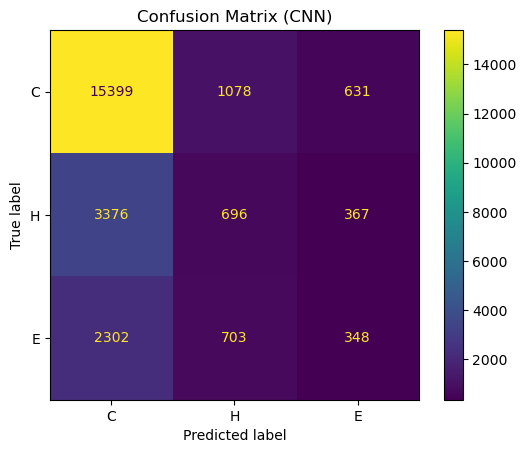

In [24]:
# Metrics Analysis for CNN

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Flatten
y_true_flat = y_true.flatten()
y_pred_flat = y_pred.flatten()

# Metrics
cnn_acc = accuracy_score(y_true_flat, y_pred_flat) * 100
cnn_pre = precision_score(y_true_flat, y_pred_flat, average='macro', zero_division=0) * 100
cnn_rec = recall_score(y_true_flat, y_pred_flat, average='macro', zero_division=0) * 100
cnn_f1 = f1_score(y_true_flat, y_pred_flat, average='macro', zero_division=0) * 100
cnn_mcc = matthews_corrcoef(y_true_flat, y_pred_flat)

print(f"Accuracy     : {cnn_acc:.2f}%")
print(f"Precision    : {cnn_pre:.2f}%")
print(f"Recall       : {cnn_rec:.2f}%")
print(f"F1 Score     : {cnn_f1:.2f}%")
print(f"MCC          : {cnn_mcc:.2f}")


# Flatten for classification report

from sklearn.metrics import classification_report

print('Classification Report CNN:\n')
print(classification_report(y_true.flatten(), y_pred.flatten(), target_names=['C', 'H', 'E']))

# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_flat, y_pred_flat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['C', 'H', 'E'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix (CNN)")
plt.grid(False)
plt.show()



In [25]:
####.  Build BiLSTM Model ####

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization, TimeDistributed

bilstm_model = Sequential([
    Input(shape=(MAX_LEN, 8)),
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),

    TimeDistributed(Dense(128, activation='relu')),
    Dropout(0.3),

    TimeDistributed(Dense(3, activation='softmax'))  # Now outputs (batch, 498, 3)
])

bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bilstm_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 498, 128)       │        37,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 498, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 498, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 498, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 498, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 498, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 498, 128)       │        16,512 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 498, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 498, 3)         │           387 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,115 (602.01 KB)

 Trainable params: 153,603 (600.01 KB)

 Non-trainable params: 512 (2.00 KB)

In [26]:
# Train the BiLSTM Model with sample_weight
# Use the same sample_weights you used for the CNN model:

#  Train the BiLSTM model
history_bilstm = bilstm_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    sample_weight=sample_weights
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 153s 10s/step - accuracy: 0.4535 - loss: 1.3867 - val_accuracy: 0.6925 - val_loss: 1.0939
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.7517 - loss: 0.8488 - val_accuracy: 0.7004 - val_loss: 1.0365
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.7753 - loss: 0.7434 - val_accuracy: 0.7005 - val_loss: 1.0181
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.7675 - loss: 0.7047 - val_accuracy: 0.7011 - val_loss: 0.9948
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.7819 - loss: 0.6343 - val_accuracy: 0.7017 - val_loss: 0.9890
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.7829 - loss: 0.6230 - val_accuracy: 0.7015 - val_loss: 1.0002
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.7742 - loss: 0.6319 - val_accuracy: 0.7012 - val_loss: 0.9921
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7687 - loss: 0.6551 - val_accuracy: 0.7014 - val_loss: 0.9986
Epoch 

In [27]:
# Evaluate the Model
# Predict on test data
pred_bilstm = bilstm_model.predict(X_test)
y_pred_bilstm = np.argmax(pred_bilstm, axis=-1)
y_true_bilstm = np.argmax(y_test, axis=-1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 15s/step



Accuracy    : 66.31%
Precision   : 80.07%
Recall      : 66.31%
F1 Score    : 70.15%
MCC         : 0.46
 Classification Report (BiLSTM):
              precision    recall  f1-score   support

           C       1.00      0.69      0.81     17108
           H       0.36      0.65      0.47      4439
           E       0.36      0.57      0.44      3353

    accuracy                           0.66     24900
   macro avg       0.58      0.63      0.57     24900
weighted avg       0.80      0.66      0.70     24900



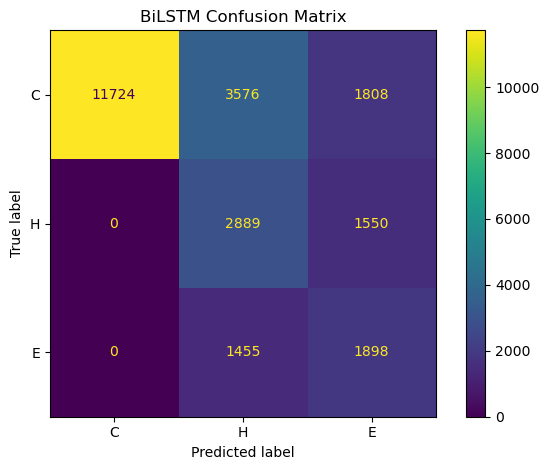

In [28]:
##  Print Evaluation Metrics

from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, matthews_corrcoef, classification_report)

# Flatten predictions
y_pred_flat = y_pred_bilstm.flatten()
y_true_flat = y_true_bilstm.flatten()


# Accuracy, Precision, Recall, F1, MCC (in %)
bilstm_acc = accuracy_score(y_true_flat, y_pred_flat) * 100
bilstm_pre = precision_score(y_true_flat, y_pred_flat, average='weighted') * 100
bilstm_rec = recall_score(y_true_flat, y_pred_flat, average='weighted') * 100
bilstm_f1 = f1_score(y_true_flat, y_pred_flat, average='weighted') * 100
bilstm_mcc = matthews_corrcoef(y_true_flat, y_pred_flat)


print(f"\nAccuracy    : {bilstm_acc:.2f}%")
print(f"Precision   : {bilstm_pre:.2f}%")
print(f"Recall      : {bilstm_rec:.2f}%")
print(f"F1 Score    : {bilstm_f1:.2f}%")
print(f"MCC         : {bilstm_mcc:.2f}")

# Flatten for classification report
print(" Classification Report (BiLSTM):")
print(classification_report(y_true_flat, y_pred_flat, target_names=['C', 'H', 'E']))


# Plot Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_flat, y_pred_flat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['C', 'H', 'E'])
disp.plot(cmap='viridis', xticks_rotation=0)
plt.title("BiLSTM Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()



In [29]:
# BiLSTM Learning Curves (Accuracy & Loss)

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots for Accuracy and Loss
fig = make_subplots(rows=1, cols=2, subplot_titles=('BiLSTM Accuracy over Epochs', 'BiLSTM Loss over Epochs'))

# --- Accuracy Plot ---
fig.add_trace(go.Scatter(
    y=history_bilstm.history['accuracy'],
    mode='lines+markers',
    name='Train Accuracy',
    line=dict(color='blue')
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=history_bilstm.history['val_accuracy'],
    mode='lines+markers',
    name='Validation Accuracy',
    line=dict(color='green')
), row=1, col=1)

# --- Loss Plot ---
fig.add_trace(go.Scatter(
    y=history_bilstm.history['loss'],
    mode='lines+markers',
    name='Train Loss',
    line=dict(color='red')
), row=1, col=2)

fig.add_trace(go.Scatter(
    y=history_bilstm.history['val_loss'],
    mode='lines+markers',
    name='Validation Loss',
    line=dict(color='orange')
), row=1, col=2)

# Layout
fig.update_layout(
    title='BiLSTM Learning Curves',
    xaxis_title='Epoch',
    yaxis_title='Score',
    showlegend=True,
    width=1000,
    height=400
)

fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)
fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.show()


In [30]:
from tensorflow.keras.layers import Input

#For BiLSTM
def build_bilstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Bidirectional(LSTM(64, return_sequences=True)),
        BatchNormalization(),
        Dropout(0.3),
        Bidirectional(LSTM(64, return_sequences=True)),
        BatchNormalization(),
        Dropout(0.3),
        TimeDistributed(Dense(128, activation='relu')),
        Dropout(0.3),
        TimeDistributed(Dense(3, activation='softmax'))
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


## For CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization, ReLU, Reshape

def build_cnn_model(input_shape, max_len):
    model = Sequential([
        Input(shape=input_shape),  # input_shape = (max_len, num_features)

        Conv1D(64, kernel_size=3, padding='same'),
        BatchNormalization(),
        ReLU(),
        Dropout(0.3),
        MaxPooling1D(pool_size=2),

        Conv1D(128, kernel_size=3, padding='same'),
        BatchNormalization(),
        ReLU(),
        Dropout(0.3),
        MaxPooling1D(pool_size=2),

        Conv1D(256, kernel_size=3, padding='same'),
        BatchNormalization(),
        ReLU(),
        Dropout(0.3),
        MaxPooling1D(pool_size=2),

        Flatten(),
        Dense(128),
        BatchNormalization(),
        ReLU(),
        Dropout(0.4),

        Dense(max_len * 3, activation='softmax'),  # 3 for Q3 classes: C, H, E
        Reshape((max_len, 3))  # reshape to (batch, seq_len, 3)
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [31]:
#  K-Fold Training Loop

from sklearn.model_selection import KFold
import numpy as np

# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 16
NUM_FOLDS = 5

# Storage for results
cnn_scores = []
bilstm_scores = []

# KFold Setup (shuffle to ensure randomness)
kfold = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=42)

# K-Fold Loop
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_scaled, y_encoded)):
    print(f"\n==== Fold {fold + 1} ====")

    # Prepare data
    X_train_fold = X_scaled[train_idx]
    y_train_fold = y_onehot[train_idx]
    X_val_fold = X_scaled[val_idx]
    y_val_fold = y_onehot[val_idx]

    # Build & Train CNN
    cnn = build_cnn_model(input_shape=(X_train_fold.shape[1], X_train_fold.shape[2]), max_len=X_train_fold.shape[1])
    history_cnn = cnn.fit(
        X_train_fold, y_train_fold,
        epochs=EPOCHS, batch_size=BATCH_SIZE,
        validation_data=(X_val_fold, y_val_fold),
        verbose=0
    )
    cnn_val_acc = history_cnn.history['val_accuracy'][-1]
    cnn_scores.append(cnn_val_acc)

    # Build & Train BiLSTM
    bilstm = build_bilstm_model(input_shape=(X_train_fold.shape[1], X_train_fold.shape[2]))
    history_bilstm = bilstm.fit(
        X_train_fold, y_train_fold,
        epochs=EPOCHS, batch_size=BATCH_SIZE,
        validation_data=(X_val_fold, y_val_fold),
        verbose=0
    )
    bilstm_val_acc = history_bilstm.history['val_accuracy'][-1]
    bilstm_scores.append(bilstm_val_acc)

    print(f" CNN Val Accuracy    : {cnn_val_acc:.4f}")
    print(f" BiLSTM Val Accuracy : {bilstm_val_acc:.4f}")



==== Fold 1 ====
 CNN Val Accuracy    : 0.7765
 BiLSTM Val Accuracy : 0.7819

==== Fold 2 ====
 CNN Val Accuracy    : 0.7949
 BiLSTM Val Accuracy : 0.7953

==== Fold 3 ====
 CNN Val Accuracy    : 0.7865
 BiLSTM Val Accuracy : 0.7887

==== Fold 4 ====
 CNN Val Accuracy    : 0.7932
 BiLSTM Val Accuracy : 0.7997

==== Fold 5 ====
 CNN Val Accuracy    : 0.8391
 BiLSTM Val Accuracy : 0.8404


In [32]:
import numpy as np

print("\n====== Cross-Validation Summary ======")
print(f"CNN  Mean Accuracy    : {np.mean(cnn_scores)*100:.2f}% ± {np.std(cnn_scores)*100:.2f}")
print(f"BiLSTM Mean Accuracy : {np.mean(bilstm_scores)*100:.2f}% ± {np.std(bilstm_scores)*100:.2f}")



====== Cross-Validation Summary ======
CNN  Mean Accuracy    : 79.80% ± 2.15
BiLSTM Mean Accuracy : 80.12% ± 2.05


In [33]:
# Final test evaluation metrics
#  5-Fold CV scores

cnn_cv_scores = cnn_scores  # list of 5 accuracies
bilstm_cv_scores = bilstm_scores

cnn_cv_mean = np.mean(cnn_cv_scores) * 100
cnn_cv_std = np.std(cnn_cv_scores) * 100

bilstm_cv_mean = np.mean(bilstm_cv_scores) * 100
bilstm_cv_std = np.std(bilstm_cv_scores) * 100


In [34]:
import pandas as pd

# Create the metrics table
metrics_df = pd.DataFrame({
    'Model': ['CNN', 'BiLSTM'],
    'Accuracy': [cnn_acc, bilstm_acc],
    'Precision': [cnn_pre, bilstm_pre],
    'Recall': [cnn_rec, bilstm_rec],
    'F1 Score': [cnn_f1, bilstm_f1],
    'MCC': [cnn_mcc, bilstm_mcc],
    'CV Accuracy Mean': [cnn_cv_mean, bilstm_cv_mean]
})

# Round values for better display
metrics_df = metrics_df.round(2)

# Show table
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,MCC,CV Accuracy Mean
0,CNN,66.04,42.34,38.69,38.53,0.15,79.80
1,BiLSTM,66.31,80.07,66.31,70.15,0.46,80.12


In [35]:
import plotly.graph_objects as go

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
cnn_values = [cnn_acc, cnn_pre, cnn_rec, cnn_f1, cnn_cv_mean]
bilstm_values = [bilstm_acc, bilstm_pre, bilstm_rec, bilstm_f1, bilstm_cv_mean]

# Optional: Error bars for CV Accuracy
cnn_errors = [0, 0, 0, 0, cnn_cv_std]
bilstm_errors = [0, 0, 0, 0, bilstm_cv_std]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics,
    y=cnn_values,
    name='CNN',
    marker_color='blue',
    error_y=dict(type='data', array=cnn_errors, visible=True)
))

fig.add_trace(go.Bar(
    x=metrics,
    y=bilstm_values,
    name='BiLSTM',
    marker_color='green',
    error_y=dict(type='data', array=bilstm_errors, visible=True)
))

fig.update_layout(
    title='Model Comparison: CNN vs BiLSTM',
    yaxis_title='Percentage (%)',
    barmode='group',
    template='plotly_white',
    yaxis=dict(range=[0, 100])
)

fig.show()


In [36]:
import plotly.graph_objects as go

# MCC values
models = ['CNN', 'BiLSTM']
mcc_scores = [cnn_mcc, bilstm_mcc]

# Create plot
fig = go.Figure(data=[
    go.Bar(name='MCC', x=models, y=mcc_scores, marker_color=['blue', 'green'])
])

fig.update_layout(
    title='MCC Comparison: CNN vs BiLSTM',
    yaxis_title='Matthews Correlation Coefficient',
    yaxis=dict(range=[0, 1]),
    template='plotly_white'
)

fig.show()


Confidence Interval (CI)

A confidence interval gives a range of values that is likely to contain the true value of a metric (like accuracy), based on sample (test data).

It's used to express uncertainty in performance evaluation.

Adding confidence intervals and performing statistical tests like McNemar’s test helps to compare model performance, going beyond just raw accuracy or F1-scores.

These methods determine whether the performance differences between models are statistically significant or just due to random chance

In [37]:
# CNN and BiLSTM Metrics with Confidence Interval:

from statsmodels.stats.proportion import proportion_confint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Flatten true and predicted labels
y_true_flat = y_true.flatten()
y_pred_cnn_flat = y_pred.flatten() # Use the flattened prediction from the last CNN evaluation
y_pred_bilstm_flat = y_pred_bilstm.flatten() # Use the flattened prediction from the last BiLSTM evaluation

n = len(y_true_flat)

# CNN Metrics
acc_cnn = accuracy_score(y_true_flat, y_pred_cnn_flat)
correct_cnn = int(acc_cnn * n)
ci_low_cnn, ci_high_cnn = proportion_confint(count=correct_cnn, nobs=n, alpha=0.05, method='normal')

# BiLSTM Metrics
acc_bilstm = accuracy_score(y_true_flat, y_pred_bilstm_flat)
correct_bilstm = int(acc_bilstm * n)
ci_low_bilstm, ci_high_bilstm = proportion_confint(count=correct_bilstm, nobs=n, alpha=0.05, method='normal')

# Store in DataFrame
dl_results = [
    {
        'Model': 'CNN',
        'Accuracy': round(acc_cnn * 100, 2),
        '95% CI(Lower)': round(ci_low_cnn * 100, 2),
        '95% CI(Upper)': round(ci_high_cnn * 100, 2),
        'Precision(Macro)': round(precision_score(y_true_flat, y_pred_cnn_flat, average='macro', zero_division=0) * 100, 2),
        'Recall(Macro)': round(recall_score(y_true_flat, y_pred_cnn_flat, average='macro', zero_division=0) * 100, 2),
        'F1-Score(Macro)': round(f1_score(y_true_flat, y_pred_cnn_flat, average='macro', zero_division=0) * 100, 2),
        'MCC': round(matthews_corrcoef(y_true_flat, y_pred_cnn_flat), 2)
    },
    {
        'Model': 'BiLSTM',
        'Accuracy': round(acc_bilstm * 100, 2),
        '95% CI(Lower)': round(ci_low_bilstm * 100, 2),
        '95% CI(Upper)': round(ci_high_bilstm * 100, 2),
        'Precision(Macro)': round(precision_score(y_true_flat, y_pred_bilstm_flat, average='macro', zero_division=0) * 100, 2),
        'Recall(Macro)': round(recall_score(y_true_flat, y_pred_bilstm_flat, average='macro', zero_division=0) * 100, 2),
        'F1-Score(Macro)': round(f1_score(y_true_flat, y_pred_bilstm_flat, average='macro', zero_division=0) * 100, 2),
        'MCC': round(matthews_corrcoef(y_true_flat, y_pred_bilstm_flat), 2)
    }
]

df_dl_metrics = pd.DataFrame(dl_results)

In [38]:
# Display metrics table
print("\n Final Metrics with 95% Confidence Intervals:\n")
df_dl_metrics


 Final Metrics with 95% Confidence Intervals:



,Model,Accuracy,95% CI(Lower),95% CI(Upper),Precision(Macro),Recall(Macro),F1-Score(Macro),MCC
0,CNN,66.04,65.45,66.62,42.34,38.69,38.53,0.15
1,BiLSTM,66.31,65.72,66.90,57.53,63.41,57.39,0.46


In [39]:
## Flatten
y_true_flat = y_true.flatten()
y_pred_cnn_flat = y_pred.flatten() # Use the flattened prediction from the last CNN evaluation
y_pred_bilstm_flat = y_pred_bilstm.flatten() # Use the flattened prediction from the last BiLSTM evaluation

# Apply McNemar's Test

from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

def mcnemar_test(pred1, pred2, y_true, name1, name2):
    b = np.sum((pred1 == y_true) & (pred2 != y_true))  # model1 correct, model2 wrong
    c = np.sum((pred1 != y_true) & (pred2 == y_true))  # model1 wrong, model2 correct
    table = [[0, b], [c, 0]]
    result = mcnemar(table, exact=True)

    print(f"\n{name1} vs {name2} → McNemar’s Test p-value: {result.pvalue:.4f}")
    if result.pvalue < 0.05:
        print("→ Statistically significant difference ")
    else:
        print("→ No significant difference ")

In [40]:
mcnemar_test(y_pred_cnn_flat, y_pred_bilstm_flat, y_true_flat, name1="CNN", name2="BiLSTM")



CNN vs BiLSTM → McNemar’s Test p-value: 0.4652
→ No significant difference 


In [41]:
## : ROC Curve Plotly for CNN and BiLSTM

import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Flatten true labels
y_true_bin = y_test.reshape(-1, 3)     # One-hot true labels → shape (n_samples, 3)

# Get predicted probabilities from the models
cnn_score = cnn_model.predict(X_test)
bilstm_score = bilstm_model.predict(X_test)

# Reshape probabilities to match the flattened true labels (if needed, though predict usually returns (samples, classes))
# The predict output should already be (n_samples, n_classes), let's verify shape before reshaping
# If the models output (batch_size, sequence_length, num_classes), we need to flatten the sequence_length dimension

if cnn_score.ndim == 3:
    cnn_score = cnn_score.reshape(-1, cnn_score.shape[-1])

if bilstm_score.ndim == 3:
    bilstm_score = bilstm_score.reshape(-1, bilstm_score.shape[-1])


# Labels and setup
class_labels = ['C', 'H', 'E']
class_colors = ['crimson', 'seagreen', 'royalblue']
models_dict = {
    "CNN": cnn_score,
    "BiLSTM": bilstm_score
}

# Initialize plotly figure
fig = go.Figure()

# Plot ROC curves per model per class
for model_name, y_score in models_dict.items():
    for i in range(3):  # Loop over C, H, E
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)

        fig.add_trace(go.Scatter(
            x=fpr,
            y=tpr,
            mode='lines',
            name=f"{model_name} – {class_labels[i]} (AUC={roc_auc:.2f})",
            line=dict(width=2),
            hovertemplate=f"Model: {model_name}<br>Class: {class_labels[i]}<br>AUC: {roc_auc:.2f}<extra></extra>"
        ))

# Diagonal baseline
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(dash='dash', color='gray'),
    showlegend=False
))

# Layout
fig.update_layout(
    title='CNN vs BiLSTM – ROC Curves (One-vs-Rest)',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=950,
    height=600,
    legend=dict(
        font=dict(size=11),
        orientation="v"
    ),
    template="plotly_white"
)

fig.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 458ms/step
